# Start


In [3]:
import numpy as np
import pandas as pd
from collections import UserDict, defaultdict
import json
import pickle
import ast

In [11]:
def send_to_dataframe(l):
    r=pd.DataFrame.from_dict(l[0],orient='index')
    #print(r)
    for i  in l[1:]:
        #print(e)
        e=pd.DataFrame.from_dict(i,orient='index')
        r=pd.concat([r, e], axis=1)
        #print(r)
    df=r.T.reset_index().drop(columns=['index'])
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df

list_of_dictionaries=[]
for line in  open("smiles_datasets_experiments.txt", 'r'):
    line=line.rstrip('n')
    #print(line)
    dictionary = ast.literal_eval(line)
    list_of_dictionaries.append(dictionary)




In [12]:
df=send_to_dataframe(list_of_dictionaries) 
df=df.fillna(0)
#print(df.columns)

generators_labels=['STGG','GDSS','HierVAE','MoFlow','WGAN','Train1']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']
structural_metrics=['wl_mmd','nspdk_mmd']
molecular_metrics=molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
new_metrics=['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']

generators=['stgg','gdss','hiervae','moflow','wgan','train1']
df_mean_by_generator=df.groupby('generator_name').mean()
df_mean_by_dataset=df.groupby('dataset').mean()

gdss=df[df.generator_name=='gdss']
stgg=df[df.generator_name=='stgg']
wgan=df[df.generator_name=='wgan']
hiervae=df[df.generator_name=='hiervae']
moflow=df[df.generator_name=='moflow']
train1=df[df.generator_name=='train1']
ames=df[df.dataset=='ames']
bbb_martins=df[df.dataset=='bbb_martins']
cyp1a2_veith=df[df.dataset=='cyp1a2_veith']
cyp2c19_veith=df[df.dataset=='cyp2c19_veith']
herg_karim=df[df.dataset=='herg_karim']
lipophilicity=df[df.dataset=='lipophilicity']



In [10]:
import multiprocessing as mp
mp.cpu_count()


8

In [16]:
df[['dataset', 'generator_name','AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nspdk_time']]

,dataset,generator_name,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time
0,ames,train2,1.000000,65.977533
1,bbb_martins,train2,1.000000,23.096335
2,cyp1a2_veith,train2,0.999999,186.808470
3,cyp2c19_veith,train2,0.965056,149.797914
4,herg_karim,train2,0.999997,225.766444
5,lipophilicity_astrazeneca,train2,1.000000,50.218388
6,ames,train1/2+train2/2,0.203239,64.713757
7,bbb_martins,train1/2+train2/2,0.399020,22.375483
8,cyp1a2_veith,train1/2+train2/2,0.570685,156.856678
9,cyp2c19_veith,train1/2+train2/2,0.000000,169.175772


#  Correlation

valid                                   NaN
unique@1000                        0.316015
unique@10000                       0.436592
FCD/Test                          -0.161416
SNN/Test                           0.247273
Frag/Test                          0.216717
FCD/TestSF                         0.149850
SNN/TestSF                         0.253197
Frag/TestSF                       -0.151931
IntDiv                            -0.181096
IntDiv2                           -0.157617
Filters                            0.199976
logP                              -0.306045
SA                                -0.251075
QED                               -0.367967
weight                            -0.327184
Novelty                                 NaN
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

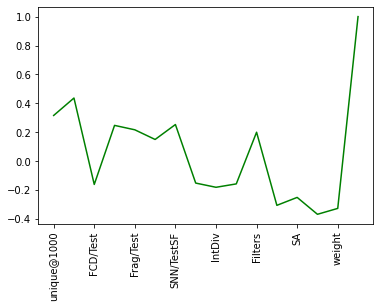

In [50]:
molecular_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft=df[molecular_metrics].apply(pd.to_numeric)
molecular_metrics.pop()
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk']).dropna().plot(kind='line',rot=90,color="green")
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk'])

wl_mmd                            -0.299532
nspdk_mmd                         -0.301862
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

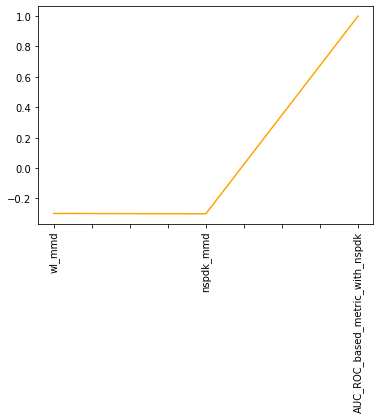

In [51]:
structural_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft2=df[structural_metrics].apply(pd.to_numeric)
structural_metrics.pop()
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="orange")
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk'])

<AxesSubplot: >

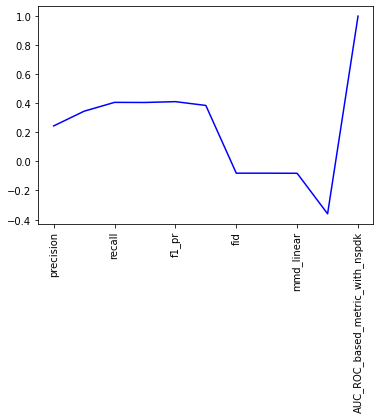

In [52]:
nn_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft3=df[nn_metrics].apply(pd.to_numeric)
nn_metrics.pop()
dft3.corrwith(dft3['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="blue")

# New metric

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


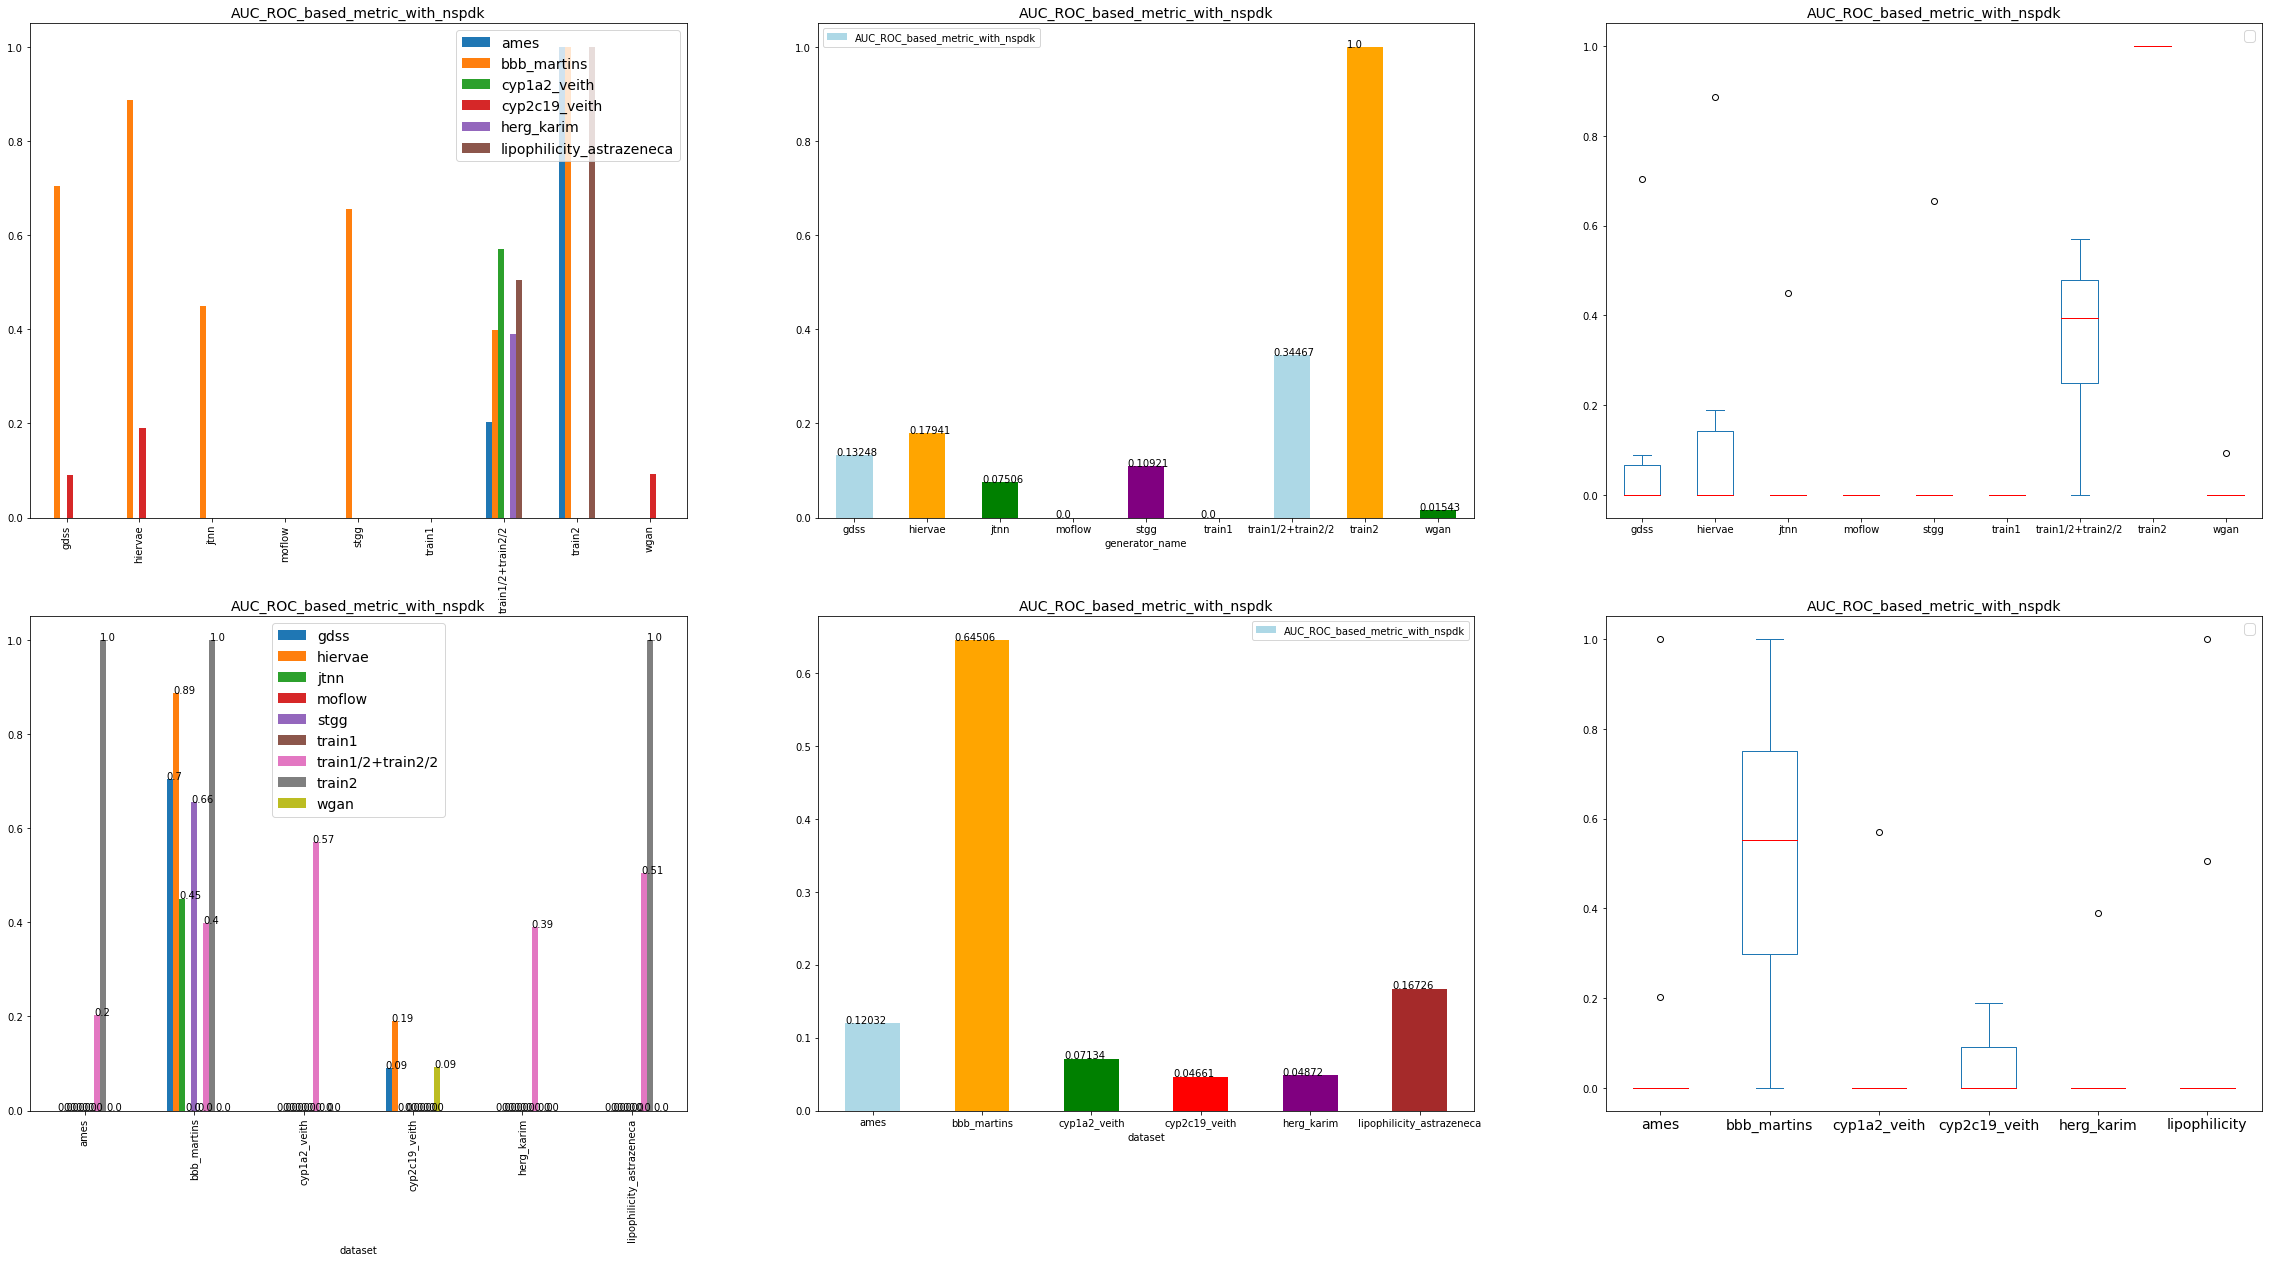

In [73]:

from matplotlib import pyplot as plt
def look_at_data_according_to_a_metric(metric_name):
    c = ['lightblue', 'orange', 'green', 'red', 'purple','gray']

    fig, ax = plt.subplots(2,3,figsize=(40, 20))
    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(ax=ax[0,0],kind='bar')
    ax[0,0].set_title(metric_name,fontsize=14)
    #ax[0,0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,0].legend(fontsize=14, loc='upper right')
    #for p in ax[0,0].patches:
        #ax[0,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))



    df_mean_by_generator[metric_name].plot.bar(ax=ax[0,1],rot=0,stacked=False,color =  c)
    ax[0,1].legend(fontsize=10,)
    ax[0,1].set_title(metric_name,fontsize=14)
    #ax[0,1].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=

    for p in ax[0,1].patches:
        ax[0,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))


    c = ['lightblue', 'orange', 'green', 'red', 'purple','brown','gray']
    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='box',ax=ax[0,2],color=dict(medians='r'))
    ax[0,2].set_title(metric_name,fontsize=14)
    #ax[0,2].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,2].legend(fontsize=14)

    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='bar',ax=ax[1,0])
    ax[1,0].set_title(metric_name,fontsize=14)
    #ax[1,0].set_xticklabels(datasets,fontdict={'fontsize':14})
    ax[1,0].legend(fontsize=14)
    for p in  ax[1,0].patches:
        ax[1,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))


    ax[1,1]=df_mean_by_dataset[metric_name].plot.bar(ax=ax[1,1],rot=0,stacked=False,color =  c)
    ax[1,1].legend(fontsize=10)
    ax[1,1].set_title(metric_name,fontsize=14)
    #ax[1,1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1,1].patches:
        ax[1,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height())  )

    
    import matplotlib

    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(kind='box',ax=ax[1,2],color=dict(medians='r'))
    ax[1,2].set_title(metric_name,fontsize=14)
    ax[1,2].set_xticklabels(datasets,fontdict={'fontsize':14})
    #ax[1,2].set_label(generators_labels)
    ax[1,2].legend(fontsize=14)

    



look_at_data_according_to_a_metric('AUC_ROC_based_metric_with_nspdk')




In [1]:
df[['dataset','generator_name','AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nspdk_time']]

NameError: name 'df' is not defined

## New metrics's Time

KeyError: "['AUC_ROC_based_metric_with_nn_classifier'] not in index"

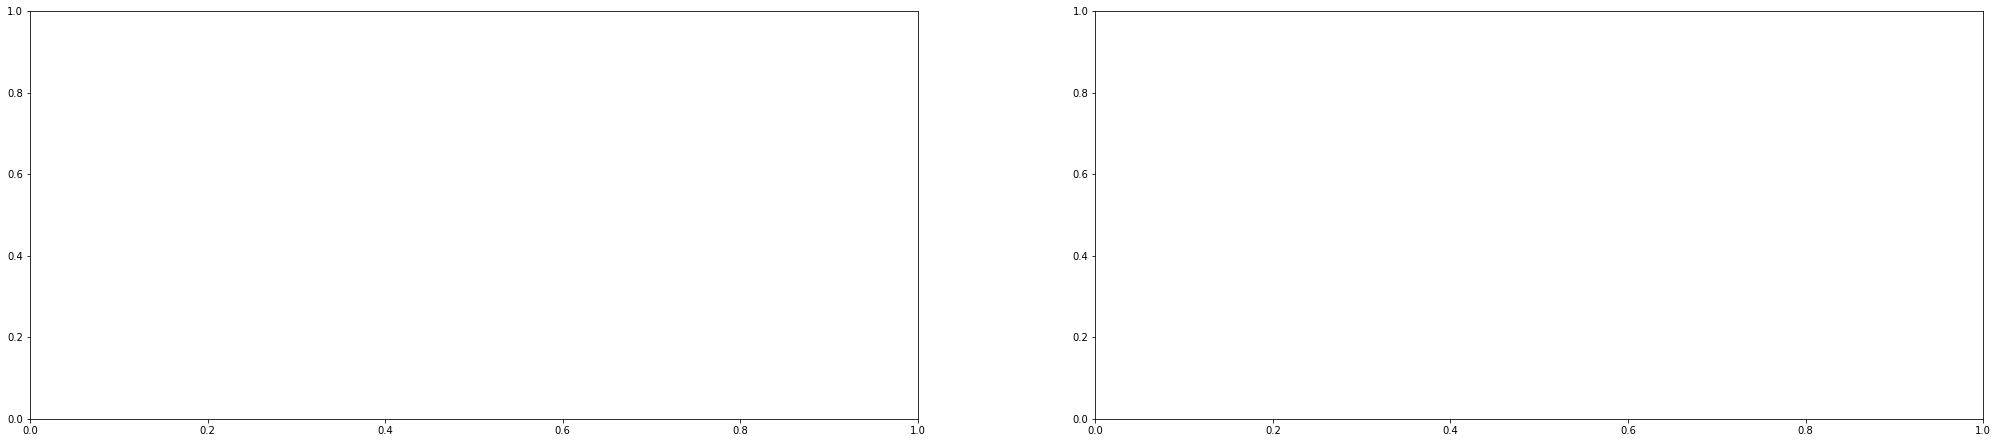

In [56]:
def compare_two_metrics(metric1, metric2,time=False):
    fix,ax=plt.subplots(1,2,figsize=(35,7.5))
    df_mean_by_generator[[metric1,metric2]].plot.bar(ax=ax[0],rot=0,stacked=False,color={'deepskyblue','sandybrown'})
    ax[0].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
    ax[0].set_title(metric1+' VS ' +metric2)
    #ax[0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[0].patches:
        ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
    #plt.subplots_adjust(right=1.5)

    df_mean_by_dataset[[metric1,metric2]].plot.bar(ax=ax[1],rot=45,stacked=False,color={'deepskyblue','sandybrown'})
    ax[1].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
    ax[1].set_title(metric1+' VS ' +metric2)
    #ax[1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1].patches:
        ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
    
    fix,ax=plt.subplots(figsize=(25  ,5))

    ax=df[[metric1, metric2]].plot(ax=ax,subplots=False,rot=45,kind='box')
    plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
    
    if time:

            fix,ax=plt.subplots(1,2,figsize=(35,7.5))

            ax[1]=df_mean_by_dataset[[metric2+'_time',metric1+'_time']].plot(ax=ax[1],subplots=False,rot=90,kind='bar')
            #ax[1].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
            for p in ax[1].patches:
                ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))

            ax[0]=df_mean_by_generator[[metric2+'_time',metric1+'_time']].plot(ax=ax[0],subplots=False,rot=90,kind='bar')
            #ax[0].set_xticklabels(labels=generators_labels,fontdict={'fontsize':12 }, rotation=0)
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
            for p in ax[0].patches:
                ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
            fix,ax=plt.subplots(figsize=(25  ,5))

            ax=df[[metric2+'_time',metric1+'_time']].plot(ax=ax,subplots=False,rot=45,kind='box')
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
compare_two_metrics('AUC_ROC_based_metric_with_nn_classifier','AUC_ROC_based_metric_with_nspdk',time=False)



# Molecular metrics

In [4]:
from evaluation.utils import get_data,  get_mock_data,remove_empty_graphs_and_targets,\
    get_generated_data,preprocess
from evaluation.moses.metrics.utils  import logP, QED, SA,weight
from evaluation.mol_structure import list_of_smiles_to_nx_graphs
from rdkit import Chem
from rdkit.Chem import GetFormalCharge
from collections  import defaultdict
import pandas as pd

In [2]:
molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']

## Distribution of  QED, logP, SA and molecular weight  properties 




In [22]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
dfs=[]
for dataset_name in current_smiles_datasets:
    for split in splits:
        smiles = []
        with open('data/smiles/{}/train1_smiles.txt'.format(dataset_name + split)) as my_file:
            for line in my_file:
                smiles.append(line.strip())
        train1_graphs=smiles
        mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
        log_p =[logP(mol) for mol in mols]
        qeds= [QED(mol) for mol in mols]
        sas= [SA(mol) for mol in mols]
        weights=[weight(mol) for mol in mols]
        d1={'generator':'original','dataset':dataset_name + split,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
        dfs.append(pd.DataFrame(data=d1))

        

In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
generators=['gdss','stgg','hiervae','moflow','wgan']
gens=[]
for generator_name in generators:
     for dataset_name in current_smiles_datasets:
                for split in splits:

                        print(generator_name,dataset_name+split)
                        pos_list, neg_list=[],[]
                        path_postives='data/smiles/{}/{}_gen_pos_{}.txt'.format(dataset_name+split,dataset_name+split,generator_name)
                        with open(path_postives) as my_file:
                                for line in my_file:
                                        pos_list.append(line.strip())
                        path_negatives='data/smiles/{}/{}_gen_neg_{}.txt'.format(dataset_name+split,dataset_name+split,generator_name)
                        with open(path_negatives) as my_file:
                                for line in my_file:
                                        neg_list.append(line.strip())
                        smiles=pos_list+neg_list
                        train1_graphs=smiles
                        try:
                                mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
                                log_p =[logP(mol) for mol in mols]
                                qeds= [QED(mol) for mol in mols]
                                sas= [SA(mol) for mol in mols]
                                weights=[weight(mol) for mol in mols]
                                d1={'generator': generator_name,'dataset':dataset_name+split,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
                                gens.append(pd.DataFrame(data=d1))

                        except:
                                mols =0
                                log_p =0
                                qeds= 0
                                sas= 0
                                weights=0
                        
                                d1={'generator': generator_name,'dataset':dataset_name+split,'logP':[log_p], 'qed':[qeds],'SAS':[sas],'weight':[weights]}
                                gens.append(pd.DataFrame(data=d1))

              
              
                

In [27]:
new1=pd.concat([dfs[i] for i in range(24) ], axis=0)
new2=pd.concat([gens[i] for i in range(len(gens))], axis=0)
new=pd.concat([new1,new2], axis=0)
new.to_csv('out.csv', index=False)

120

Text(0.5, 1.0, 'Molecular Weight')

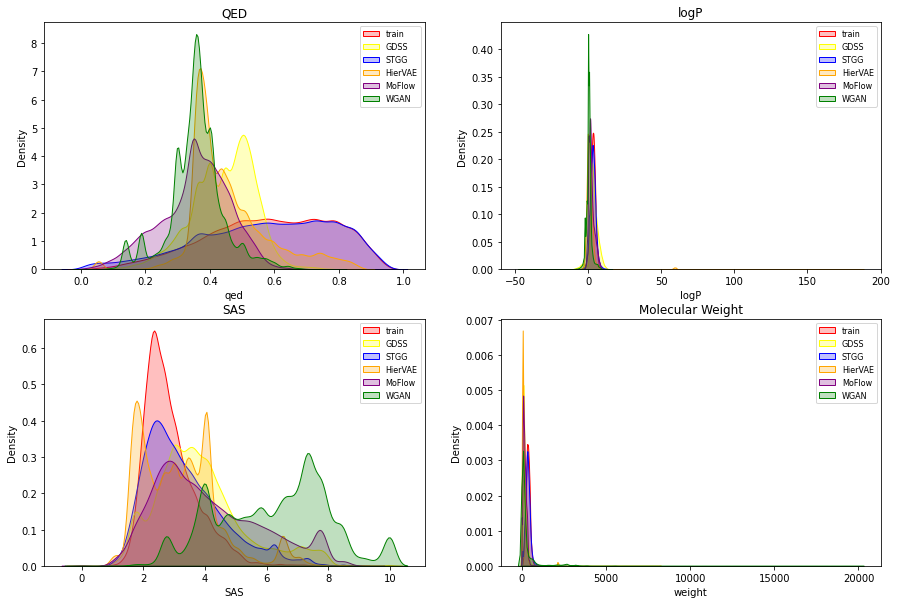

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(new[new.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(new[new.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(new[new.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(new[new.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(new[new.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(new[new.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(new[new.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(new[new.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(new[new.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


In [88]:
new_copy=new.copy()

In [99]:
only_25=new_copy.loc[(new_copy.dataset=='ames_25') | (new_copy.dataset=='bbb_martins_25') | \
                      (new_copy.dataset=='herg_karim_25') | (new_copy.dataset=='cyp1a2_veith_25') \
                        | (new_copy.dataset=='cyp2c19_veith_25')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_25')   ]
only_33=new_copy.loc[(new_copy.dataset=='ames_33') | (new_copy.dataset=='bbb_martins_33') | \
                      (new_copy.dataset=='herg_karim_33') | (new_copy.dataset=='cyp1a2_veith_33') \
                        | (new_copy.dataset=='cyp2c19_veith_33')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_33')   ]
only_40=new_copy.loc[(new_copy.dataset=='ames_40') | (new_copy.dataset=='bbb_martins_40') | \
                      (new_copy.dataset=='herg_karim_40') | (new_copy.dataset=='cyp1a2_veith_40') \
                        | (new_copy.dataset=='cyp2c19_veith_40')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_40') ]
only_50=new_copy.loc[(new_copy.dataset=='ames_50') | (new_copy.dataset=='bbb_martins_50') | \
                      (new_copy.dataset=='herg_karim_50') | (new_copy.dataset=='cyp1a2_veith_50') \
                        | (new_copy.dataset=='cyp2c19_veith_50')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_50') ]

Text(0.5, 1.0, 'Molecular Weight')

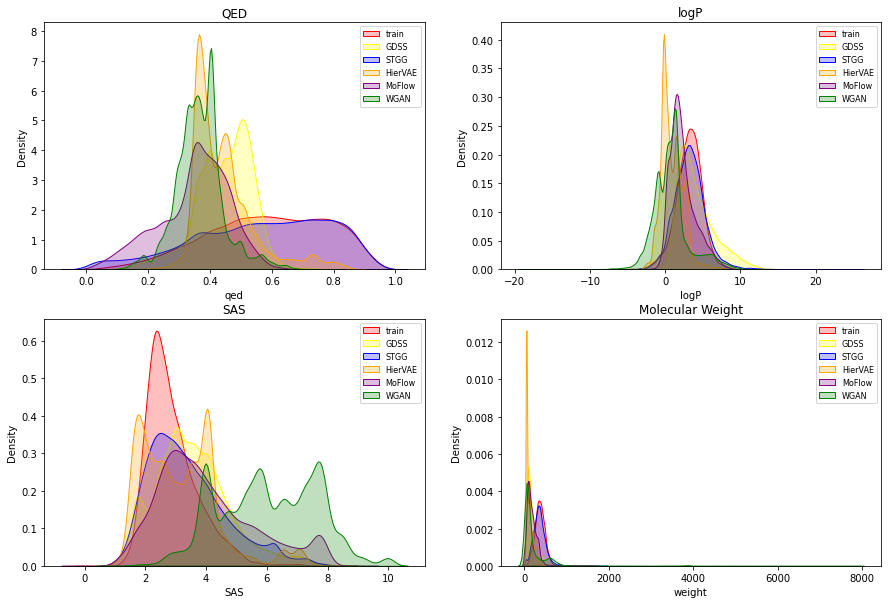

In [107]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_25[only_25.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_25[only_25.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_25[only_25.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_25[only_25.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_25[only_25.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

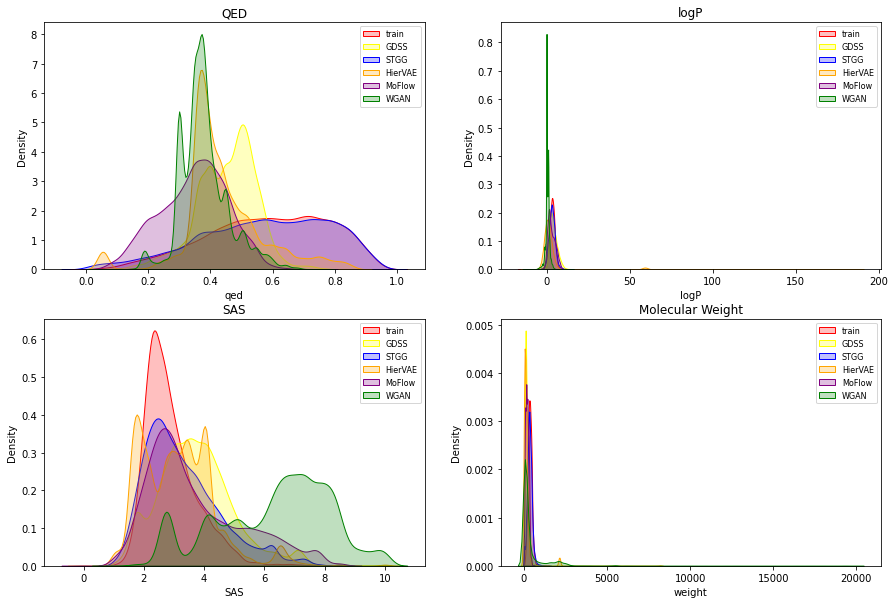

In [106]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_33[only_33.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(only_33[only_33.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_33[only_33.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_33[only_33.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_33[only_33.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_33[only_33.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_33[only_33.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_33[only_33.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_33[only_33.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

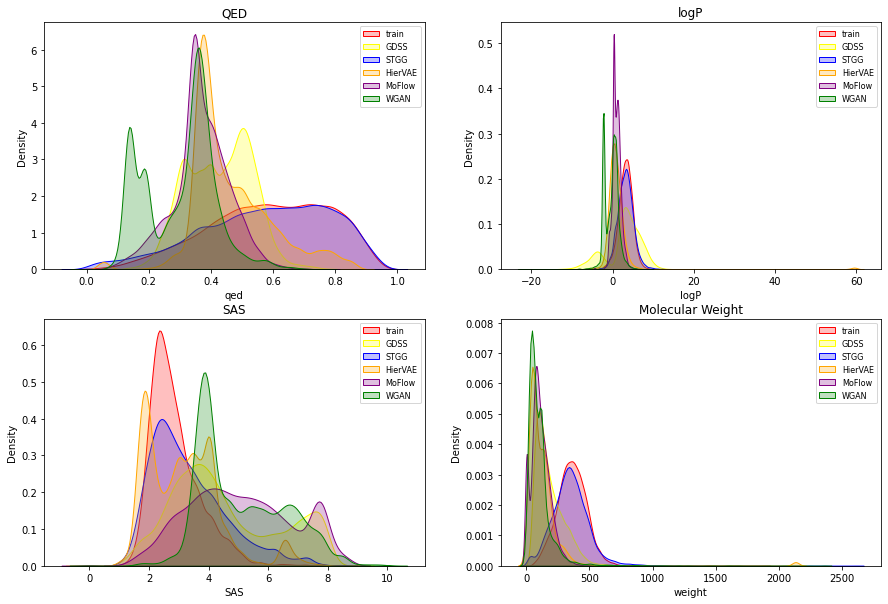

In [105]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_40[only_40.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(only_40[only_40.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_40[only_40.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_40[only_40.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_40[only_40.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_40[only_40.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_40[only_40.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_40[only_40.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_40[only_40.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

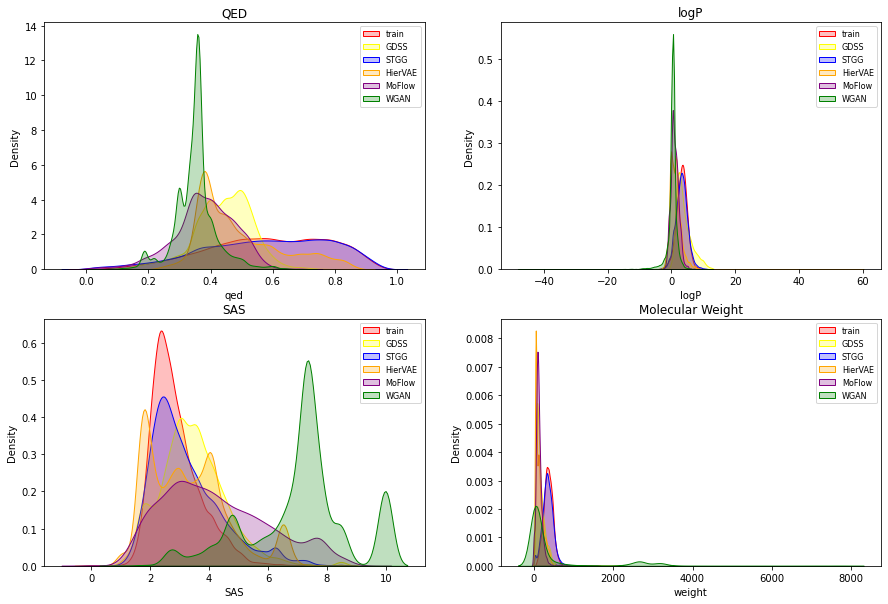

In [104]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_50[only_50.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(only_50[only_50.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_50[only_50.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_50[only_50.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_50[only_50.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_50[only_50.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_50[only_50.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_50[only_50.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_50[only_50.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


##  Other visualisations

In [66]:
df[molecular_metrics+['generator_name']]

,valid,unique@1000,unique@10000,FCD/Test,SNN/Test,Frag/Test,FCD/TestSF,SNN/TestSF,Frag/TestSF,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,Novelty,generator_name
0,1.0,0.702000,0.516686,2.137591e-03,0.998920,0.999925,52.982194,0.081466,0.0,0.388605,0.355914,0.952101,0.142568,0.009608,0.003680,4.814196,1.0,train2
1,1.0,0.811533,0.811533,6.002505e-03,0.996142,0.999865,53.038630,0.087174,0.0,0.355402,0.330469,0.984529,0.420760,0.024800,0.010865,21.498988,1.0,train2
2,1.0,0.811533,0.811533,6.002505e-03,0.996142,0.999865,53.038630,0.087174,0.0,0.355402,0.330469,0.984529,0.420760,0.024800,0.010865,21.498988,1.0,train2
3,1.0,0.811533,0.811533,6.002505e-03,0.996142,0.999865,53.038630,0.087174,0.0,0.355402,0.330469,0.984529,0.420760,0.024800,0.010865,21.498988,1.0,train2
4,1.0,0.811533,0.811533,6.002505e-03,0.996142,0.999865,53.038630,0.087174,0.0,0.355402,0.330469,0.984529,0.420760,0.024800,0.010865,21.498988,1.0,train2
5,1.0,0.852000,0.778912,4.412020e-03,0.998379,0.999989,53.023351,0.091756,0.0,0.303823,0.286427,0.994558,0.137629,0.013109,0.003693,7.800633,1.0,train2
6,1.0,0.660000,0.499607,1.204757e-03,0.999286,0.999958,52.975764,0.081015,0.0,0.385829,0.352862,0.951689,0.129529,0.004941,0.002440,1.929890,1.0,train1/2+train2/2
7,1.0,0.812676,0.812676,6.700634e-05,0.998226,0.999985,53.071417,0.089129,0.0,0.331466,0.309014,0.981690,0.241016,0.011305,0.003875,9.762744,1.0,train1/2+train2/2
8,1.0,0.836000,0.581004,1.375729e-03,0.998778,1.000000,53.009576,0.092599,0.0,0.279964,0.263118,0.969098,0.061948,0.006324,0.001530,2.302275,1.0,train1/2+train2/2
9,1.0,0.834000,0.599955,8.133453e-04,0.999054,-1.000000,52.986031,0.092399,1.0,0.284500,0.267489,0.969314,0.081021,0.003989,0.001988,4.055472,1.0,train1/2+train2/2


In [65]:
molecular_metrics_to_display=['valid', 'Novelty','unique@1000', 'Frag/Test' ,'FCD/Test', 'FCD/TestSF','SNN/Test','SNN/TestSF' , 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight']
df_mean_by_generator[molecular_metrics_to_display]

,valid,Novelty,unique@1000,Frag/Test,FCD/Test,FCD/TestSF,SNN/Test,SNN/TestSF,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
generator_name,,,,,,,,,,,,,,,
gdss,1.0,1.0,0.209719,0.656540,7.976076e-02,53.223909,0.924508,0.056856,0.205201,0.179489,0.999659,2.531831,0.211136,0.090319,195.799336
hiervae,1.0,1.0,0.177784,0.664799,8.815542e-02,52.961044,0.974186,0.074442,0.397477,0.353504,0.996188,7.269326,0.141827,0.116294,290.872822
jtnn,1.0,1.0,0.163448,0.697912,1.353347e-01,52.999520,0.939650,0.071014,0.456412,0.398020,0.979690,6.220803,0.103375,0.119500,263.425260
moflow,1.0,1.0,0.438000,0.891514,8.667442e-02,52.615763,0.906264,0.069219,0.533961,0.488515,0.776219,4.773151,0.257554,0.098524,215.408128
stgg,1.0,1.0,0.768238,0.666366,2.793829e-03,53.040613,0.998676,0.089870,0.307325,0.286557,0.982241,0.575715,0.019894,0.012431,24.349490
train1,1.0,1.0,0.807885,0.333333,-5.445415e-08,53.042405,1.000000,0.089885,0.314552,0.293835,0.975251,0.000000,0.000000,0.000000,0.000000
train1/2+train2/2,1.0,1.0,0.804613,0.333322,1.466672e-03,53.019897,0.999005,0.089907,0.314592,0.293927,0.975607,0.106451,0.006511,0.002665,3.870281
train2,1.0,1.0,0.800022,0.999896,5.093272e-03,53.026678,0.996978,0.086986,0.352339,0.327370,0.980796,0.327206,0.020319,0.008472,16.435130
wgan,1.0,1.0,0.411108,0.634266,2.878543e+00,52.239195,0.518056,0.059065,0.603370,0.516109,0.436450,10.941022,0.856410,0.068748,273.879177


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


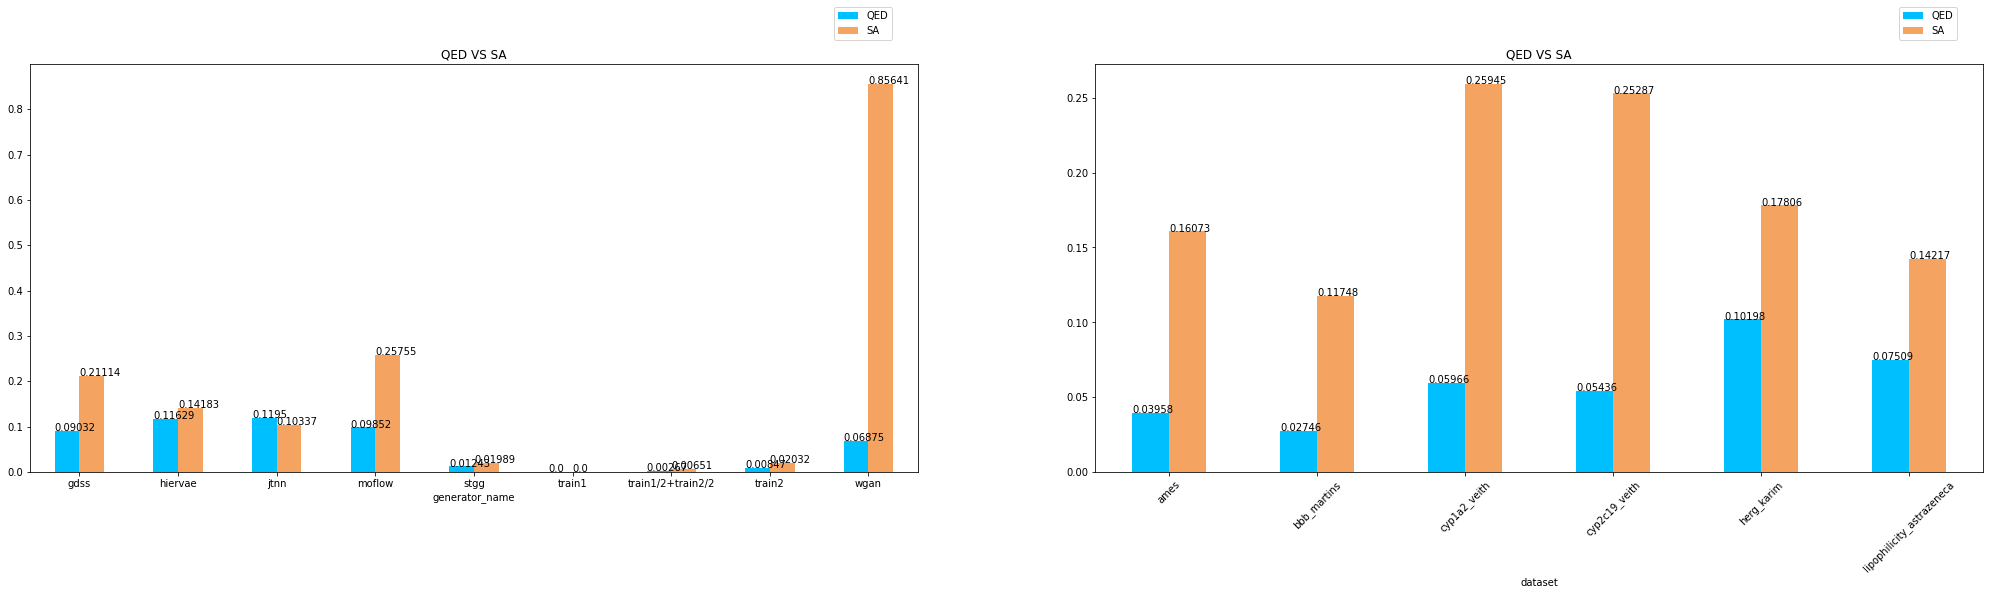

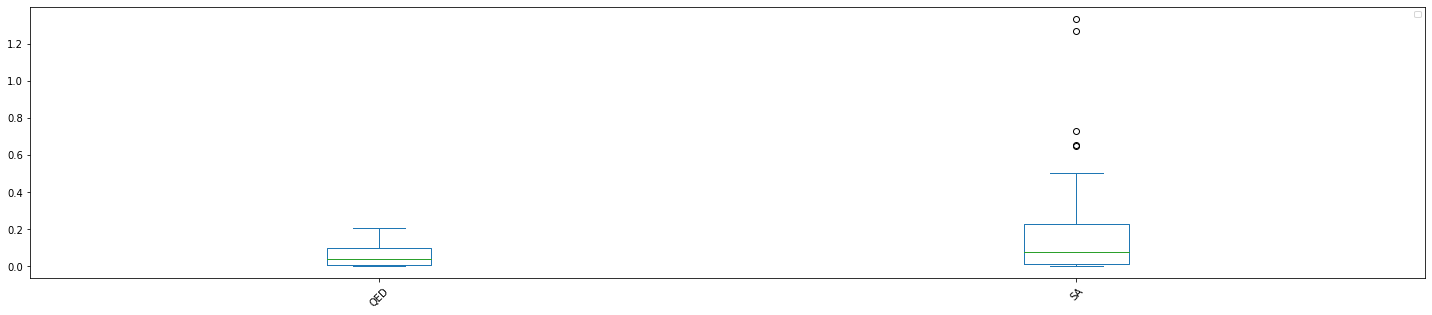

In [64]:
compare_two_metrics('QED','SA')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


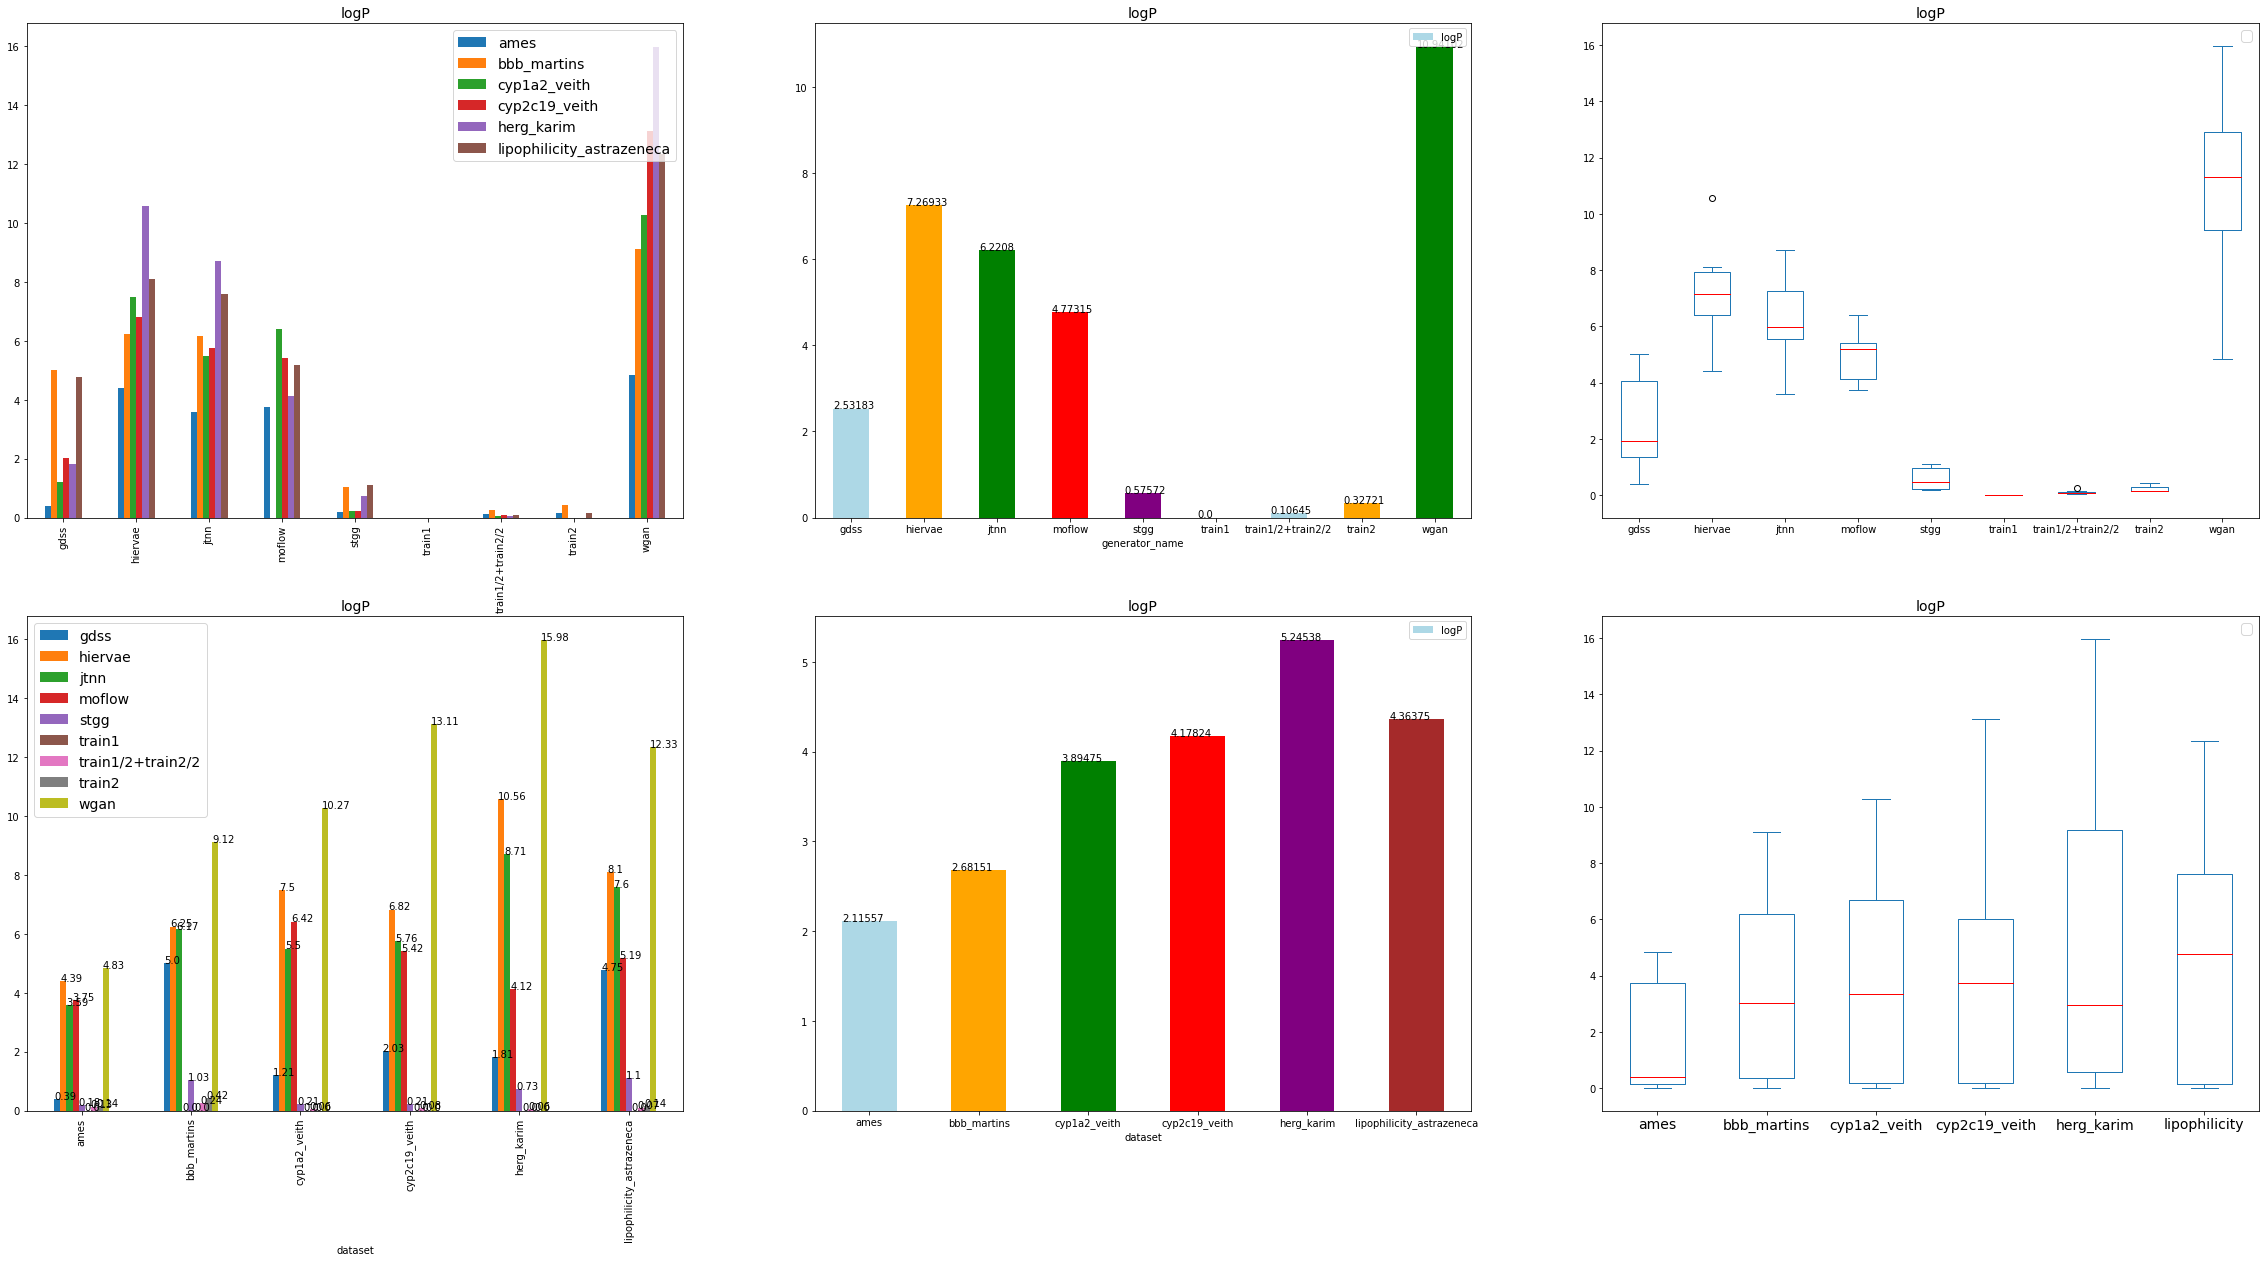

In [63]:
look_at_data_according_to_a_metric('logP')


# NN_based metrics

In [62]:
df_mean_by_generator[nn_metrics]

,precision,density,recall,coverage,f1_pr,f1_dc,fid,kid,mmd_linear,mmd_rbf
generator_name,,,,,,,,,,
gdss,0.817896,0.591057,0.137111,0.066009,0.222422,0.112774,1.175385e+02,1.736892e+01,92.923193,0.517389
hiervae,0.904110,0.723584,0.072910,0.048477,0.125667,0.089476,1.992278e+02,6.931976e+02,159.488201,0.750210
jtnn,0.877804,0.708313,0.091408,0.035878,0.147770,0.067266,1.699997e+02,3.808636e+01,144.826368,0.717489
moflow,0.878492,0.605141,0.173350,0.062406,0.217017,0.109174,1.429443e+07,1.232513e+19,598670.145220,0.527592
stgg,0.936066,0.967690,0.874621,0.871675,0.902768,0.914108,9.221602e+00,4.808906e-01,1.202395,0.014511
train1,1.000000,1.200293,1.000000,1.000000,1.000010,1.091040,-1.639190e-08,-1.504439e+00,0.000000,0.000000
train1/2+train2/2,0.980151,1.097461,0.983729,0.998784,0.981943,1.045720,8.103634e-01,-7.002341e-01,0.029386,0.000550
train2,0.958398,0.980110,0.971968,0.968236,0.965129,0.974128,6.415420e+00,7.973100e-01,0.492419,0.002352
wgan,0.514493,0.212494,0.047849,0.008594,0.042067,0.015976,1.591373e+04,1.957308e+08,5118.444238,0.802689


In [ ]:
{'activations_time': 0.6972849369049072, 'fid': 1.3730700501235589, 'fid_time': 0.701735258102417, 'kid': 0.020275593, 'kid_time': 0.746666669845581, 'precision': 0.9917517674783974, 'recall': 0.9387514723203769, 'f1_pr': 0.9645340888267413, 'precision_time': 1.2265045642852783, 'recall_time': 1.2265045642852783, 'f1_pr_time': 1.2265045642852783, 'density': 1.17643362136685, 'coverage': 0.9791912053396152, 'f1_dc': 1.0687985309867434, 'density_time': 1.0270962715148926, 'coverage_time': 1.0270962715148926, 'f1_dc_time': 1.0270962715148926, 'mmd_rbf': 0.0011846423149108887, 'mmd_rbf_time': 1.6261205673217773, 'mmd_linear': 0.14991595, 'mmd_linear_time': 0.6975932121276855, 'nspdk_mmd': 0.0005622522901392868, 'nspdk_mmd_time': 36.72433519363403, 'wl_mmd': 0.0003269389487676744, 'wl_mmd_time': 5.553701639175415, 'valid': 1.0, 'unique@1000': 0.584, 'unique@10000': 0.37038491751767477, 'FCD/Test': 0.0013606157713800526, 'SNN/Test': 0.9996399581198232, 'Frag/Test': 0.9999461721587711, 'FCD/TestSF': 52.96185071857515, 'SNN/TestSF': 0.08154201792891065, 'Frag/TestSF': 0.0, 'IntDiv': 0.3800599523174186, 'IntDiv2': 0.34724568561881564, 'Filters': 0.9603299293008641, 'logP': 0.1824547979061978, 'SA': 0.015304399874087713, 'QED': 0.0033933081396117287, 'weight': 8.570958668932956, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.910001173
, 'AUC_ROC_based_metric_with_nspdk_time': 283.3891921043396, 'AUC_ROC_based_metric_with_nn_classifier': 1.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 333.99452018737793, 'dataset': 'ames', 'generator_name': 'STGG'}
{'activations_time': 0.19810080528259277, 'fid': 20.81444319972904, 'fid_time': 0.2037804126739502, 'kid': 0.9810512, 'kid_time': 0.22387003898620605, 'precision': 0.9257142857142857, 'recall': 0.7985915492957747, 'f1_pr': 0.8574769730662182, 'precision_time': 0.2725381851196289, 'recall_time': 0.2725381851196289, 'f1_pr_time': 0.2725381851196289, 'density': 0.8580000000000001, 'coverage': 0.6985915492957746, 'f1_dc': 0.7701434768133962, 'density_time': 0.23220229148864746, 'coverage_time': 0.23220229148864746, 'f1_dc_time': 0.23220229148864746, 'mmd_rbf': 0.0428195595741272, 'mmd_rbf_time': 0.28669118881225586, 'mmd_linear': 3.3782942, 'mmd_linear_time': 0.19827604293823242, 'nspdk_mmd': 0.009430279510383721, 'nspdk_mmd_time': 13.982912063598633, 'wl_mmd': 0.011906629166907656, 'wl_mmd_time': 1.1368584632873535, 'valid': 1.0, 'unique@1000': 0.7914285714285715, 'unique@10000': 0.7914285714285715, 'FCD/Test': 0.007139263480682251, 'SNN/Test': 0.9984523808956146, 'Frag/Test': 0.999821519701264, 'FCD/TestSF': 53.114384958995274, 'SNN/TestSF': 0.08831308519733803, 'Frag/TestSF': 0.0, 'IntDiv': 0.32440933373898884, 'IntDiv2': 0.3016037541039601, 'Filters': 0.9828571428571429, 'logP': 1.030859565392356, 'SA': 0.03097179948274566, 'QED': 0.02274132451913345, 'weight': 46.6913468410463, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.804490084
, 'AUC_ROC_based_metric_with_nspdk_time': 111.25716543197632, 'AUC_ROC_based_metric_with_nn_classifier': 0, 'AUC_ROC_based_metric_with_nn_classifier_time': 110.89890050888062, 'dataset': 'bbb_martins', 'generator_name': 'STGG'}
{'activations_time': 1.208451747894287, 'fid': 7.121787957581233, 'fid_time': 1.2144274711608887, 'kid': 0.23448715, 'kid_time': 1.2788450717926025, 'precision': 0.9422762327646647, 'recall': 0.8452624403544649, 'f1_pr': 0.8911467863503494, 'precision_time': 2.6448419094085693, 'recall_time': 2.6448419094085693, 'f1_pr_time': 2.6448419094085693, 'density': 0.968450572563683, 'coverage': 0.8673028857077937, 'f1_dc': 0.9151002048752968, 'density_time': 2.1560988426208496, 'coverage_time': 2.1560988426208496, 'f1_dc_time': 2.1560988426208496, 'mmd_rbf': 0.003762543201446533, 'mmd_rbf_time': 4.3512022495269775, 'mmd_linear': 0.42875808, 'mmd_linear_time': 1.2089307308197021, 'nspdk_mmd': 0.0015962017862793387, 'nspdk_mmd_time': 102.67038464546204, 'wl_mmd': 0.002456137456197993, 'wl_mmd_time': 15.675324440002441, 'valid': 1.0, 'unique@1000': 0.771, 'unique@10000': 0.5251226922178079, 'FCD/Test': 0.0034983721854049965, 'SNN/Test': 0.9988660012193583, 'Frag/Test': 0.99995713569845, 'FCD/TestSF': 53.00698730788398, 'SNN/TestSF': 0.09298031675892891, 'Frag/TestSF': 0.0, 'IntDiv': 0.26056297702640274, 'IntDiv2': 0.24418739008622714, 'Filters': 0.9869128301004908, 'logP': 0.20763753675350274, 'SA': 0.00950368739311667, 'QED': 0.003978334427847486, 'weight': 12.69124381034947, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.190641864
, 'AUC_ROC_based_metric_with_nspdk_time': 3284.773894548416, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 716.1019458770752, 'dataset': 'cyp1a2_veith', 'generator_name': 'STGG'}
{'activations_time': 1.9201786518096924, 'fid': 6.600334170645894, 'fid_time': 1.9281785488128662, 'kid': 0.2239254, 'kid_time': 2.050598621368408, 'precision': 0.97223507635354, 'recall': 0.8364538687119333, 'f1_pr': 0.8992578713358133, 'precision_time': 3.4258999824523926, 'recall_time': 3.4258999824523926, 'f1_pr_time': 3.4258999824523926, 'density': 1.0274872744099954, 'coverage': 0.868260771486578, 'f1_dc': 0.9411972662830664, 'density_time': 2.9300408363342285, 'coverage_time': 2.9300408363342285, 'f1_dc_time': 2.9300408363342285, 'mmd_rbf': 0.005007147789001465, 'mmd_rbf_time': 5.071700096130371, 'mmd_linear': 0.760029, 'mmd_linear_time': 1.9206738471984863, 'nspdk_mmd': 0.001434614294098524, 'nspdk_mmd_time': 102.37603640556335, 'wl_mmd': 0.001556158258841478, 'wl_mmd_time': 13.456374168395996, 'valid': 1.0, 'unique@1000': 0.793, 'unique@10000': 0.512956964368348, 'FCD/Test': 0.004013351620449301, 'SNN/Test': 0.9992480333454904, 'Frag/Test': 0.9999463038125749, 'FCD/TestSF': 53.021617869858176, 'SNN/TestSF': 0.09286358533362474, 'Frag/TestSF': 0.0, 'IntDiv': 0.26635707687023025, 'IntDiv2': 0.24986048677947115, 'Filters': 0.987968533086534, 'logP': 0.2088009681396506, 'SA': 0.007882730593060118, 'QED': 0.013001109618728465, 'weight': 15.789799556416781, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.032062602
, 'AUC_ROC_based_metric_with_nspdk_time': 3484.9689717292786, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 739.4050765037537, 'dataset': 'cyp2c19_veith', 'generator_name': 'STGG'}
{'activations_time': 1.8413212299346924, 'fid': 10.220529922694851, 'fid_time': 1.848252773284912, 'kid': 0.7802348, 'kid_time': 1.910412311553955, 'precision': 0.8851747341002821, 'recall': 0.7926051848703782, 'f1_pr': 0.8363462814967519, 'precision_time': 3.371870994567871, 'recall_time': 3.371870994567871, 'f1_pr_time': 3.371870994567871, 'density': 0.8823529411764707, 'coverage': 0.8008924776880578, 'f1_dc': 0.8396615980919553, 'density_time': 2.8540852069854736, 'coverage_time': 2.8540852069854736, 'f1_dc_time': 2.8540852069854736, 'mmd_rbf': 0.01049584150314331, 'mmd_rbf_time': 5.239339590072632, 'mmd_linear': 0.7230252, 'mmd_linear_time': 1.8417952060699463, 'nspdk_mmd': 0.0017869361928026795, 'nspdk_mmd_time': 141.74938821792603, 'wl_mmd': 0.0008978034637869836, 'wl_mmd_time': 20.328009843826294, 'valid': 1.0, 'unique@1000': 0.851, 'unique@10000': 0.612763186455394, 'FCD/Test': 0.00024197395439350122, 'SNN/Test': 0.9992542404504358, 'Frag/Test': 0.9998974921216999, 'FCD/TestSF': 53.068716505903346, 'SNN/TestSF': 0.09211062688468619, 'Frag/TestSF': 0.0, 'IntDiv': 0.30187157627140615, 'IntDiv2': 0.2842800197515446, 'Filters': 0.9837204254395485, 'logP': 0.72592284964555, 'SA': 0.026496641340091283, 'QED': 0.012330489439057376, 'weight': 25.829937213285547, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.095644099
, 'AUC_ROC_based_metric_with_nspdk_time': 4579.832501888275, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 923.7170689105988, 'dataset': 'herg_karim', 'generator_name': 'STGG'}
{'activations_time': 0.4229869842529297, 'fid': 63.188534521222635, 'fid_time': 0.42696523666381836, 'kid': -14.156975, 'kid_time': 0.4654371738433838, 'precision': 0.8497913769123783, 'recall': 0.9040816326530612, 'f1_pr': 0.8761062506017878, 'precision_time': 0.6060471534729004, 'recall_time': 0.6060471534729004, 'f1_pr_time': 0.6060471534729004, 'density': 0.7593880389429764, 'coverage': 0.8285714285714286, 'f1_dc': 0.7924826798253358, 'density_time': 0.5380127429962158, 'coverage_time': 0.5380127429962158, 'f1_dc_time': 0.5380127429962158, 'mmd_rbf': 0.022064030170440674, 'mmd_rbf_time': 0.7312338352203369, 'mmd_linear': 1.4224219, 'mmd_linear_time': 0.4231743812561035, 'nspdk_mmd': 0.005077665272535503, 'nspdk_mmd_time': 35.954652309417725, 'wl_mmd': 0.0027364365709998673, 'wl_mmd_time': 2.934135675430298, 'valid': 1.0, 'unique@1000': 0.831, 'unique@10000': 0.786509040333797, 'FCD/Test': 0.0005093490707978043, 'SNN/Test': 0.9965924895025261, 'Frag/Test': 0.9998978878979857, 'FCD/TestSF': 53.07012854496585, 'SNN/TestSF': 0.09141021877040204, 'Frag/TestSF': 0.0, 'IntDiv': 0.3106891900730292, 'IntDiv2': 0.2921671860603138, 'Filters': 0.9916550764951322, 'logP': 1.0986143831663413, 'SA': 0.029205097693421025, 'QED': 0.019139389646281382, 'weight': 36.52365276602991, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.768539357
, 'AUC_ROC_based_metric_with_nspdk_time': 278.9503297805786, 'AUC_ROC_based_metric_with_nn_classifier': 0.3676947464941529, 'AUC_ROC_based_metric_with_nn_classifier_time': 267.49090576171875, 'dataset': 'lipophilicity_astrazeneca', 'generator_name': 'STGG'}
{'activations_time': 4.199569225311279, 'fid': 43.82522469398919, 'fid_time': 4.221216201782227, 'kid': 1.6082268, 'kid_time': 11.56338119506836, 'precision': 0.8648111332007953, 'recall': 0.22182960345504515, 'f1_pr': 0.3531029893271447, 'precision_time': 4.742654800415039, 'recall_time': 4.742654800415039, 'f1_pr_time': 4.742654800415039, 'density': 0.583220675944334, 'coverage': 0.14566156262269336, 'f1_dc': 0.2331180217015843, 'density_time': 4.4952003955841064, 'coverage_time': 4.4952003955841064, 'f1_dc_time': 4.4952003955841064, 'mmd_rbf': 0.23331719636917114, 'mmd_rbf_time': 4.936238765716553, 'mmd_linear': 23.882147, 'mmd_linear_time': 4.199988603591919, 'nspdk_mmd': 0.10812884345694809, 'nspdk_mmd_time': 24.102604150772095, 'wl_mmd': 0.09365006091596262, 'wl_mmd_time': 3.545039653778076, 'valid': 1.0, 'unique@1000': 0.114, 'unique@10000': 0.057256461232604375, 'FCD/Test': 0.1082776819395091, 'SNN/Test': 1.0, 'Frag/Test': 0.9818105253684924, 'FCD/TestSF': 53.23105309835924, 'SNN/TestSF': 0.04995325374940992, 'Frag/TestSF': 0.0, 'IntDiv': 0.18560363843591055, 'IntDiv2': 0.15886393607185023, 'Filters': 1.0, 'logP': 0.3905472610586972, 'SA': 0.09647881846018505, 'QED': 0.08268655489784607, 'weight': 120.22772478564033, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 190.3498957157135, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 324.8223853111267, 'dataset': 'ames', 'generator_name': 'GDSS'}
{'activations_time': 0.20775556564331055, 'fid': 142.26608723718223, 'fid_time': 0.21066904067993164, 'kid': 15.899505, 'kid_time': 0.2463524341583252, 'precision': 0.9796511627906976, 'recall': 0.4042253521126761, 'f1_pr': 0.5723168905002435, 'precision_time': 0.2687094211578369, 'recall_time': 0.2687094211578369, 'f1_pr_time': 0.2687094211578369, 'density': 1.0779069767441862, 'coverage': 0.07464788732394366, 'f1_dc': 0.13964386471224743, 'density_time': 0.24391388893127441, 'coverage_time': 0.24391388893127441, 'f1_dc_time': 0.24391388893127441, 'mmd_rbf': 0.7290270328521729, 'mmd_rbf_time': 0.2839531898498535, 'mmd_linear': 113.63526, 'mmd_linear_time': 0.2079486846923828, 'nspdk_mmd': 0.21555583973980563, 'nspdk_mmd_time': 7.707469701766968, 'wl_mmd': 0.29130528122701105, 'wl_mmd_time': 0.7291803359985352, 'valid': 1.0, 'unique@1000': 0.06831395348837209, 'unique@10000': 0.06831395348837209, 'FCD/Test': 0.07348345474169694, 'SNN/Test': 1.0, 'Frag/Test': 0.9791452714695998, 'FCD/TestSF': 53.23109126782355, 'SNN/TestSF': 0.04437812233105475, 'Frag/TestSF': 0.0, 'IntDiv': 0.035911811113744085, 'IntDiv2': 0.0313120348225997, 'Filters': 1.0, 'logP': 4.999431112839826, 'SA': 0.1774669893155172, 'QED': 0.07882322651284988, 'weight': 288.0337310227646, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.403886584
, 'AUC_ROC_based_metric_with_nspdk_time': 70.26457071304321, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 98.97541451454163, 'dataset': 'bbb_martins', 'generator_name': 'GDSS'}
{'activations_time': 1.2995493412017822, 'fid': 100.31197596102638, 'fid_time': 1.3058788776397705, 'kid': 10.664678, 'kid_time': 1.3632407188415527, 'precision': 0.9404545454545454, 'recall': 0.025221540558963872, 'f1_pr': 0.04914459044948833, 'precision_time': 2.9557430744171143, 'recall_time': 2.9557430744171143, 'f1_pr_time': 2.9557430744171143, 'density': 0.6628636363636364, 'coverage': 0.03453760508975233, 'f1_dc': 0.06567249533660652, 'density_time': 2.2794203758239746, 'coverage_time': 2.2794203758239746, 'f1_dc_time': 2.2794203758239746, 'mmd_rbf': 0.47780346870422363, 'mmd_rbf_time': 4.244511604309082, 'mmd_linear': 72.125145, 'mmd_linear_time': 1.3001699447631836, 'nspdk_mmd': 0.09982822234922056, 'nspdk_mmd_time': 66.49629592895508, 'wl_mmd': 0.11894784284753546, 'wl_mmd_time': 10.794298887252808, 'valid': 1.0, 'unique@1000': 0.239, 'unique@10000': 0.09704545454545455, 'FCD/Test': 0.0957441425401345, 'SNN/Test': 0.9952651517770507, 'Frag/Test': 0.9846703749332534, 'FCD/TestSF': 53.20992239276433, 'SNN/TestSF': 0.059704143315215, 'Frag/TestSF': 0.0, 'IntDiv': 0.3684426302129571, 'IntDiv2': 0.3216479206320406, 'Filters': 0.9979545454545454, 'logP': 1.2072143891677498, 'SA': 0.23572528004713456, 'QED': 0.07489953337830513, 'weight': 172.80978128013268, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.469383141
, 'AUC_ROC_based_metric_with_nspdk_time': 438.8825173377991, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 662.6937291622162, 'dataset': 'cyp1a2_veith', 'generator_name': 'GDSS'}
{'activations_time': 1.3090720176696777, 'fid': 101.24594890918588, 'fid_time': 1.3151416778564453, 'kid': 13.099751, 'kid_time': 1.369093894958496, 'precision': 0.9192420482743063, 'recall': 0.2115948567561471, 'f1_pr': 0.34401911883385655, 'precision_time': 2.8552377223968506, 'recall_time': 2.8552377223968506, 'f1_pr_time': 2.8552377223968506, 'density': 0.6787728400631626, 'coverage': 0.05165801939995488, 'f1_dc': 0.09602662381564576, 'density_time': 2.2796337604522705, 'coverage_time': 2.2796337604522705, 'f1_dc_time': 2.2796337604522705, 'mmd_rbf': 0.356250524520874, 'mmd_rbf_time': 4.020052194595337, 'mmd_linear': 53.12918, 'mmd_linear_time': 1.3096535205841064, 'nspdk_mmd': 0.06854646498242895, 'nspdk_mmd_time': 72.823481798172, 'wl_mmd': 0.0838966808886894, 'wl_mmd_time': 11.124818801879883, 'valid': 1.0, 'unique@1000': 0.447, 'unique@10000': 0.20302278366794496, 'FCD/Test': 0.09470963690418298, 'SNN/Test': 0.9999248063809012, 'Frag/Test': 0.9960326452754109, 'FCD/TestSF': 53.20941616911102, 'SNN/TestSF': 0.07753953943816878, 'Frag/TestSF': 0.0, 'IntDiv': 0.326665222442569, 'IntDiv2': 0.28871847010656526, 'Filters': 1.0, 'logP': 2.0260723889014196, 'SA': 0.15627967419156266, 'QED': 0.0858201554615308, 'weight': 139.7329663884503, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.387284024
, 'AUC_ROC_based_metric_with_nspdk_time': 388.080420255661, 'AUC_ROC_based_metric_with_nn_classifier': 0, 'AUC_ROC_based_metric_with_nn_classifier_time': 682.2305762767792, 'dataset': 'cyp2c19_veith', 'generator_name': 'GDSS'}
{'activations_time': 1.4015915393829346, 'fid': 174.68413584376418, 'fid_time': 1.407839059829712, 'kid': 43.20504, 'kid_time': 1.462787389755249, 'precision': 0.8603909902252443, 'recall': 0.028261793455163622, 'f1_pr': 0.054744737390347166, 'precision_time': 2.6677498817443848, 'recall_time': 2.6677498817443848, 'f1_pr_time': 2.6677498817443848, 'density': 0.4927326816829579, 'coverage': 0.014874628134296642, 'f1_dc': 0.02889636330002525, 'density_time': 2.1958069801330566, 'coverage_time': 2.1958069801330566, 'f1_dc_time': 2.1958069801330566, 'mmd_rbf': 0.4803563356399536, 'mmd_rbf_time': 4.6150970458984375, 'mmd_linear': 108.104485, 'mmd_linear_time': 1.4022886753082275, 'nspdk_mmd': 0.07597198106285569, 'nspdk_mmd_time': 101.66402220726013, 'wl_mmd': 0.10657693883084507, 'wl_mmd_time': 13.78585433959961, 'valid': 1.0, 'unique@1000': 0.322, 'unique@10000': 0.1228219294517637, 'FCD/Test': 0.05971665279936909, 'SNN/Test': 0.9999291684416777, 'Frag/Test': 0.9936213767840466, 'FCD/TestSF': 53.23088432403301, 'SNN/TestSF': 0.06361647856236137, 'Frag/TestSF': 0.0, 'IntDiv': 0.21566382863891953, 'IntDiv2': 0.19024632107993622, 'Filters': 1.0, 'logP': 1.8135507649808718, 'SA': 0.28514542553433436, 'QED': 0.10931038805118157, 'weight': 163.96126880577987, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 557.5234231948853, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 790.258024930954, 'dataset': 'herg_karim', 'generator_name': 'GDSS'}
{'activations_time': 0.45628976821899414, 'fid': 234.91739875183632, 'fid_time': 0.46004533767700195, 'kid': 64.5617, 'kid_time': 0.4924795627593994, 'precision': 0.7414965986394558, 'recall': 0.005442176870748299, 'f1_pr': 0.010824761042128098, 'precision_time': 0.689732551574707, 'recall_time': 0.689732551574707, 'f1_pr_time': 0.689732551574707, 'density': 0.3540136054421769, 'coverage': 0.007482993197278911, 'f1_dc': 0.014675378542714968, 'density_time': 0.5663654804229736, 'coverage_time': 0.5663654804229736, 'f1_dc_time': 0.5663654804229736, 'mmd_rbf': 0.8428565263748169, 'mmd_rbf_time': 0.7265541553497314, 'mmd_linear': 192.30867, 'mmd_linear_time': 0.4565584659576416, 'nspdk_mmd': 0.17514390137914065, 'nspdk_mmd_time': 19.532440662384033, 'wl_mmd': 0.2430072756903483, 'wl_mmd_time': 2.003753185272217, 'valid': 1.0, 'unique@1000': 0.069, 'unique@10000': 0.05510204081632653, 'FCD/Test': 0.046632838547228585, 'SNN/Test': 0.551927437668755, 'Frag/Test': 0.9782833961395954, 'FCD/TestSF': 53.23109317280172, 'SNN/TestSF': 0.04594374568436016, 'Frag/TestSF': 0.0, 'IntDiv': 0.098918800267503, 'IntDiv2': 0.08614753083855586, 'Filters': 1.0, 'logP': 4.754169115646253, 'SA': 0.31572009041174576, 'QED': 0.11037562570132356, 'weight': 290.0305421768708, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk':0.183009464
, 'AUC_ROC_based_metric_with_nspdk_time': 154.14641952514648, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 226.28317093849182, 'dataset': 'lipophilicity_astrazeneca', 'generator_name': 'GDSS'}

{'activations_time': 0.45628976821899414,
 'fid': 234.91739875183632,
 'fid_time': 0.46004533767700195,
 'kid': 64.5617,
 'kid_time': 0.4924795627593994,
 'precision': 0.7414965986394558,
 'recall': 0.005442176870748299,
 'f1_pr': 0.010824761042128098,
 'precision_time': 0.689732551574707,
 'recall_time': 0.689732551574707,
 'f1_pr_time': 0.689732551574707,
 'density': 0.3540136054421769,
 'coverage': 0.007482993197278911,
 'f1_dc': 0.014675378542714968,
 'density_time': 0.5663654804229736,
 'coverage_time': 0.5663654804229736,
 'f1_dc_time': 0.5663654804229736,
 'mmd_rbf': 0.8428565263748169,
 'mmd_rbf_time': 0.7265541553497314,
 'mmd_linear': 192.30867,
 'mmd_linear_time': 0.4565584659576416,
 'nspdk_mmd': 0.17514390137914065,
 'nspdk_mmd_time': 19.532440662384033,
 'wl_mmd': 0.2430072756903483,
 'wl_mmd_time': 2.003753185272217,
 'valid': 1.0,
 'unique@1000': 0.069,
 'unique@10000': 0.05510204081632653,
 'FCD/Test': 0.046632838547228585,
 'SNN/Test': 0.551927437668755,
 'Frag/Test':

# Structural metrics



In [59]:
df_mean_by_generator[structural_metrics]

,wl_mmd,nspdk_mmd
generator_name,,
gdss,0.156231,0.124047
hiervae,0.202583,0.096451
jtnn,0.176275,0.087084
moflow,0.586478,0.229699
stgg,0.003313,0.003283
train1,0.000000,0.000000
train1/2+train2/2,0.000149,0.000393
train2,0.000725,0.001932
wgan,1.158505,0.419885


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


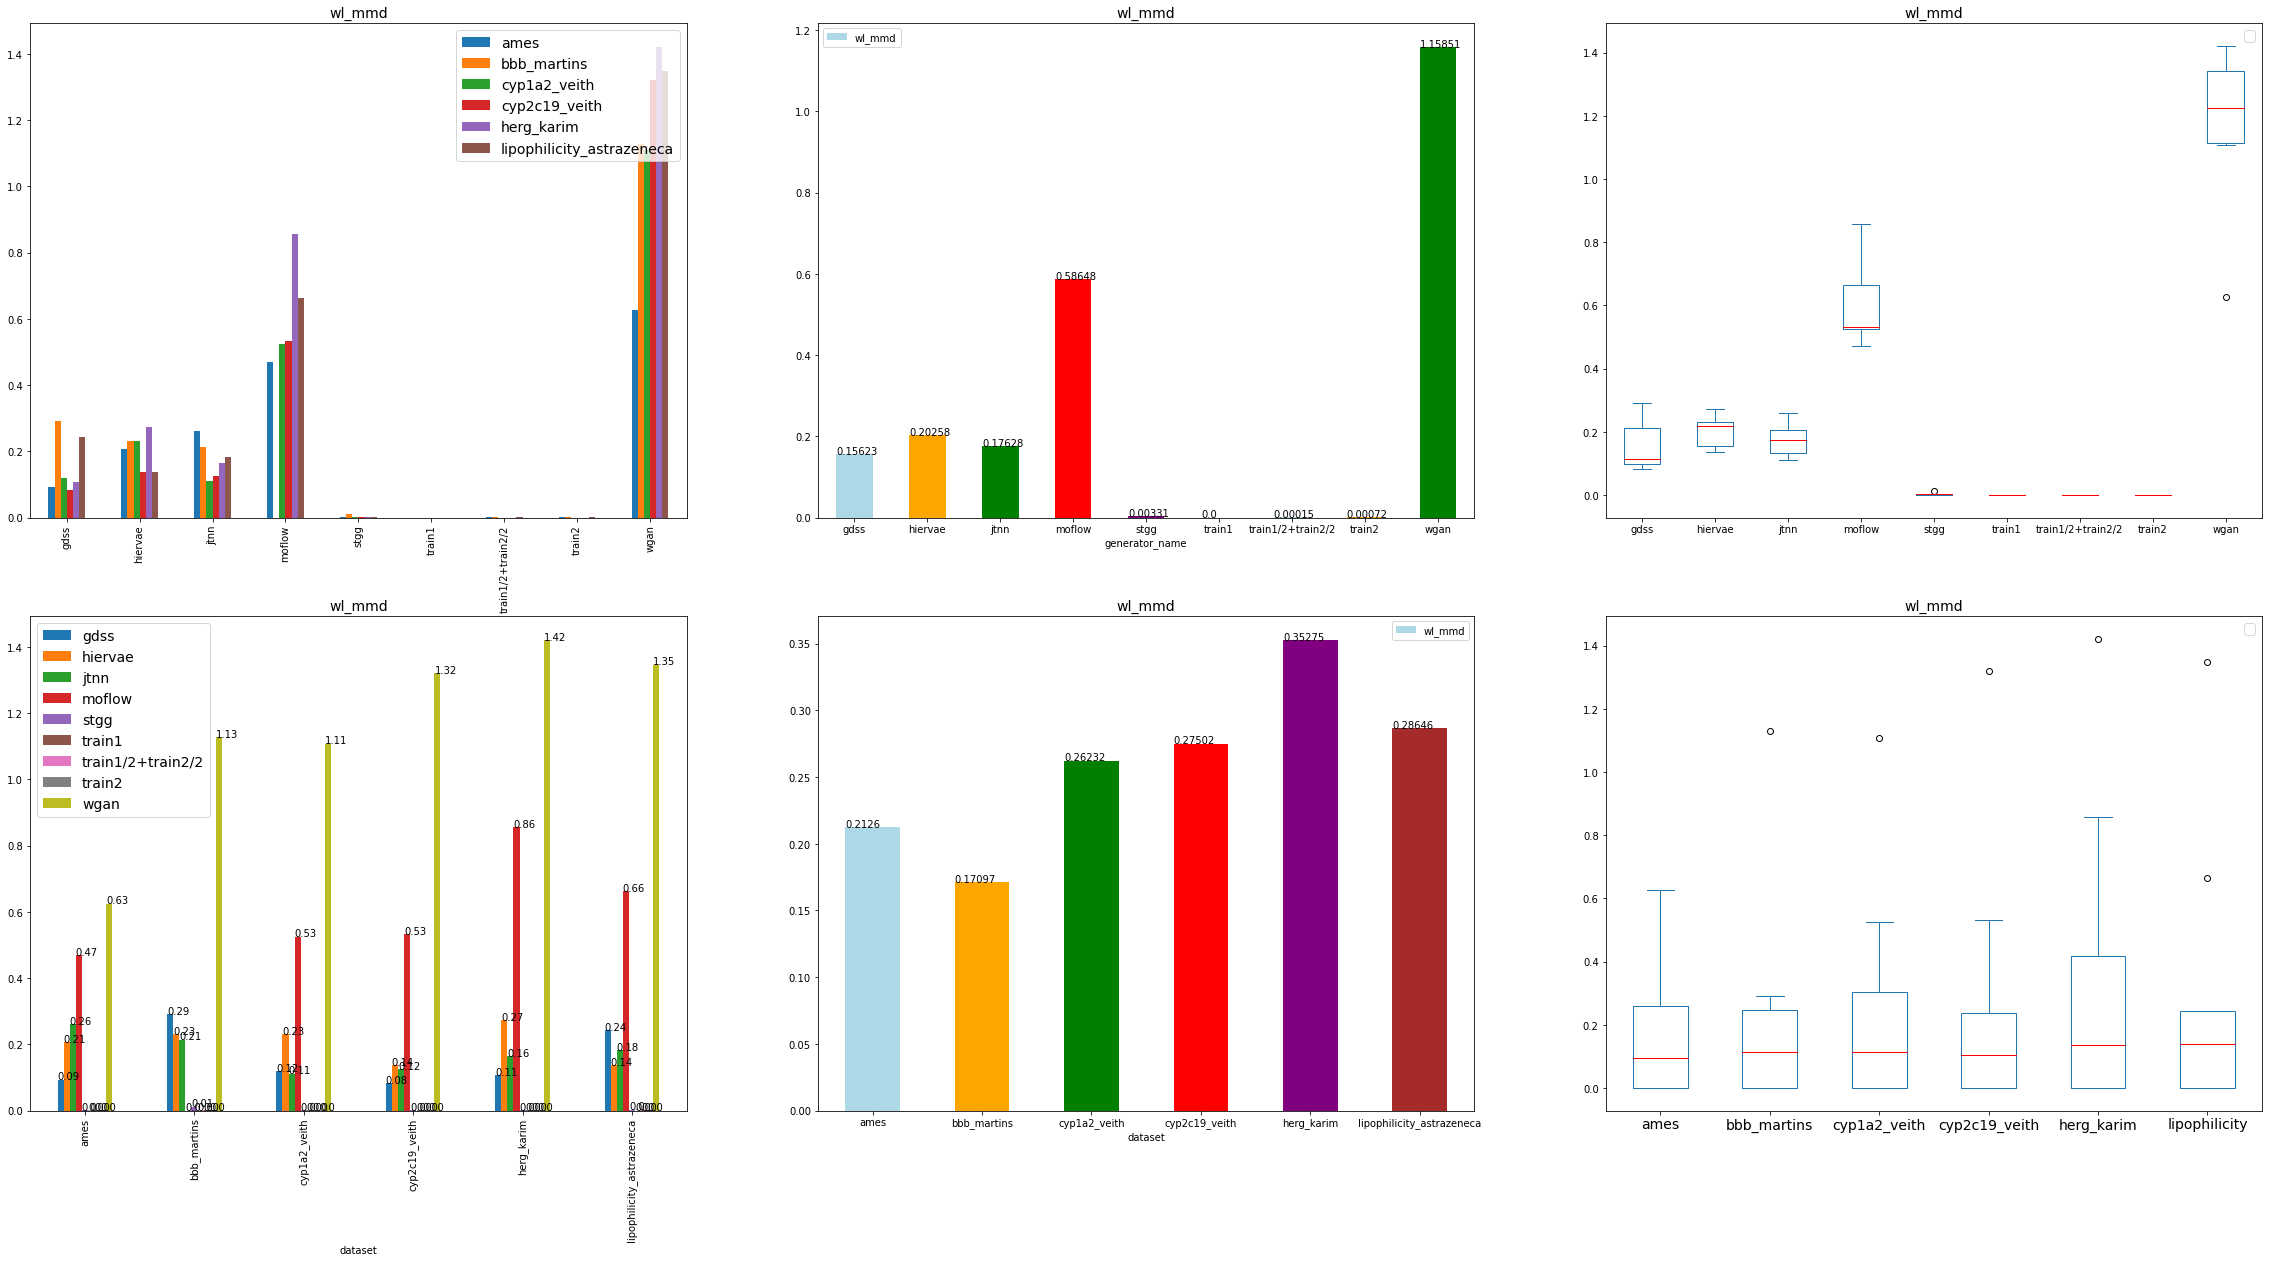

In [60]:
look_at_data_according_to_a_metric('wl_mmd')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


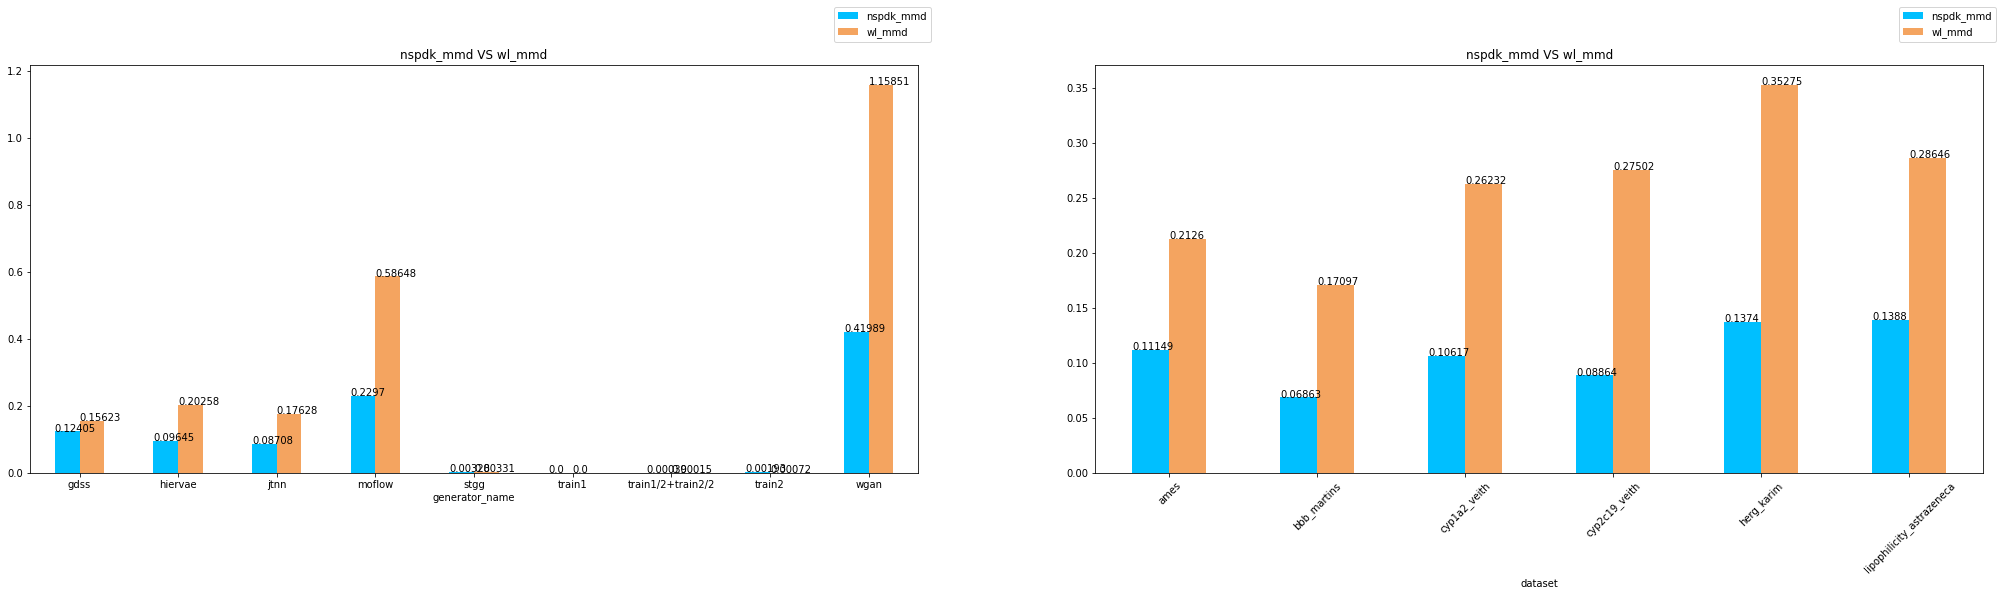

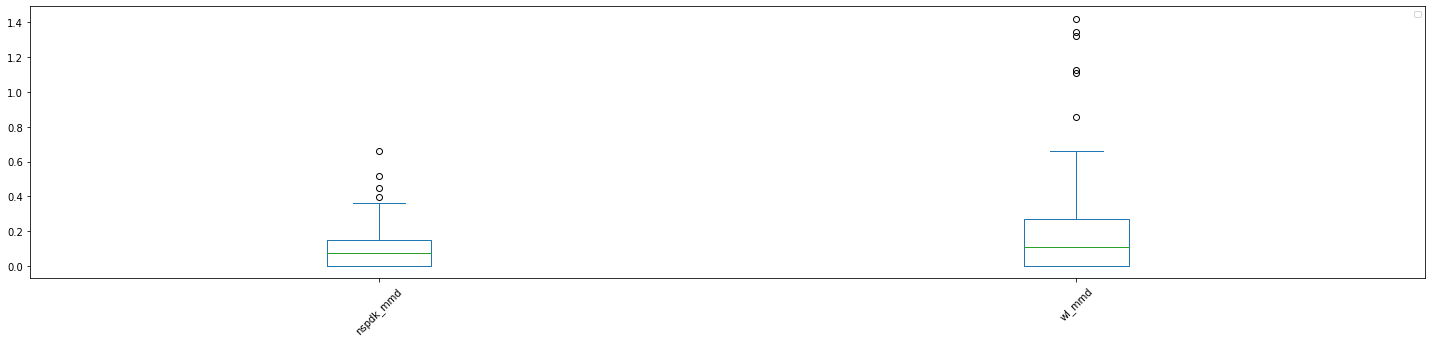

In [61]:
compare_two_metrics('nspdk_mmd','wl_mmd')


# Draft section